In [23]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as mplt
import xarray as xr
import xarray.plot as xplt
import pandas as pd
import bottleneck as bn

ecv_base = 'D:\\EOData\\CCI-TBX'
oc_pattern = os.path.join(ecv_base, 'occci-v2.0/data/geographic/netcdf/monthly/chlor_a/2010/*.nc')
st_pattern = os.path.join(ecv_base, 'sst/data/lt/Analysis/L4/v01.1/2010/*.nc')

oc_ds = xr.open_mfdataset(oc_pattern)
sst_ds = xr.open_mfdataset(st_pattern)

In [24]:
chla = oc_ds.chlor_a
sst = sst_ds.analysed_sst

In [12]:
chla

<xarray.DataArray 'chlor_a' (time: 12, lat: 4320, lon: 8640)>
dask.array<concate..., shape=(12, 4320, 8640), dtype=float64, chunksize=(1, 4320, 8640)>
Coordinates:
  * lon      (lon) float32 -179.979 -179.938 -179.896 -179.854 -179.813 ...
  * lat      (lat) float32 89.9792 89.9375 89.8958 89.8542 89.8125 89.7708 ...
  * time     (time) datetime64[ns] 2010-01-01 2010-02-01 2010-03-01 ...
Attributes:
    long_name: Chlorophyll-a concentration in seawater (not log-transformed), generated by SeaDAS using OC4v6 for SeaWiFS
    units: milligram m-3
    ancillary_variables: chlor_a_log10_rmsd,chlor_a_log10_bias
    grid_mapping: crs
    parameter_vocab_uri: http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name: mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard: mg m^-3

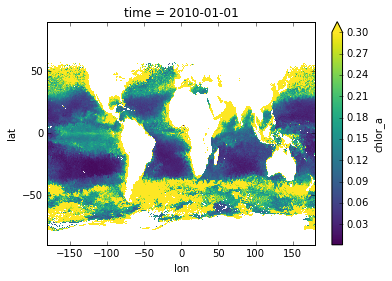

In [13]:
xplt.imshow(chla.isel(time=0), vmax=0.3)

In [14]:
sst

<xarray.DataArray 'analysed_sst' (time: 12, lat: 3600, lon: 7200)>
dask.array<concate..., shape=(12, 3600, 7200), dtype=float64, chunksize=(1, 3600, 7200)>
Coordinates:
  * lat      (lat) float32 -89.975 -89.925 -89.875 -89.825 -89.775 -89.725 ...
  * lon      (lon) float32 -179.975 -179.925 -179.875 -179.825 -179.775 ...
  * time     (time) datetime64[ns] 1947-05-12T09:58:14 2015-05-05T15:22:30 ...
Attributes:
    units: kelvin
    long_name: analysed sea surface temperature
    valid_min: -300
    valid_max: 4500
    standard_name: sea_water_temperature
    depth: 20 cm
    source: ATSR<1,2>-ESACCI-L3U-v1.0, AATSR-ESACCI-L3U-v1.0, AVHRR<12,14,15,16,17,18>_G-ESACCI-L2P-v1.0, AVHRRMTA-ESACCI-L2P-v1.0
    comment: SST analysis produced for ESA SST CCI project using the OSTIA system in reanalysis mode.

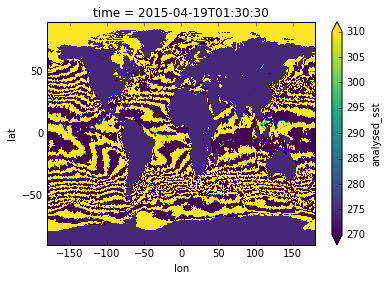

In [39]:
xr.plot.imshow(sst_ds.analysed_sst.isel(time=2), vmin=270, vmax=310)

In [40]:
ds = xr.open_dataset("D:/EOData/CCI-TBX/sst/data/lt/Analysis/L4/v01.1/2010/20100101120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc")
ds.analysed_sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 3600, lon: 7200)>
[25920000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1947-05-12T09:58:14
  * lat      (lat) float32 -89.975 -89.925 -89.875 -89.825 -89.775 -89.725 ...
  * lon      (lon) float32 -179.975 -179.925 -179.875 -179.825 -179.775 ...
Attributes:
    units: kelvin
    long_name: analysed sea surface temperature
    valid_min: -300
    valid_max: 4500
    standard_name: sea_water_temperature
    depth: 20 cm
    source: ATSR<1,2>-ESACCI-L3U-v1.0, AATSR-ESACCI-L3U-v1.0, AVHRR<12,14,15,16,17,18>_G-ESACCI-L2P-v1.0, AVHRRMTA-ESACCI-L2P-v1.0
    comment: SST analysis produced for ESA SST CCI project using the OSTIA system in reanalysis mode.

<xarray.DataArray 'analysed_sst' (time: 1, lat: 300, lon: 300)>
array([[[ 434.50999029,  431.94999035,  431.94999035, ...,  542.02998789,
          542.02998789,  536.909988  ],
        [ 421.70999058,  419.14999063,  419.14999063, ...,  544.58998783,
          542.02998789,  536.909988  ],
        [ 408.90999086,  408.90999086,  408.90999086, ...,  542.02998789,
          539.46998794,  536.909988  ],
        ..., 
        [ 472.83998943,  477.95998932,  480.51998926, ...,  462.61998966,
          457.49998978,  447.25999   ],
        [ 457.47998978,  460.03998972,  460.03998972, ...,  477.97998932,
          472.85998943,  465.1799896 ],
        [ 439.55999018,  442.11999012,  442.11999012, ...,  493.33998897,
          485.65998915,  475.41998938]]])
Coordinates:
  * time     (time) datetime64[ns] 1947-05-12T09:58:14
  * lat      (lat) float32 30.025 30.075 30.125 30.175 30.225 30.275 30.325 ...
  * lon      (lon) float32 -59.975 -59.925 -59.875 -59.825 -59.775 -59.725 ...
Attribute

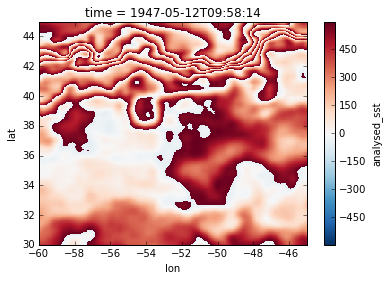

In [45]:
ds = xr.open_dataset("D:/EOData/CCI-TBX/sst/data/lt/Analysis/L4/v01.1/2010/20100101120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc")
im = ds.analysed_sst.sel(time=slice(None, None), lat=slice(30., 45.), lon=slice(-60, -45.))
print(im)
xr.plot.imshow(im[0])

In [21]:
ds.time

<xarray.DataArray 'time' (time: 1)>
array(['1947-05-12T09:58:14.000000000Z'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1947-05-12T09:58:14
Attributes:
    standard_name: time
    axis: T
    bounds: time_bnds
    comment: 
    long_name: reference time of sst file

In [17]:
import scipy.ndimage

def resamp(x):
    y = scipy.ndimage.zoom(x, [3600./4320., 7200./8640.])
    u = xr.DataArray(y)
    return u
    
lon = scipy.ndimage.zoom(chla.lon, [7200./8640.])
lat = scipy.ndimage.zoom(chla.lat, [3600./4320.])
chla_temp = chla.groupby('time').apply(resamp)
chla = xr.DataArray(chla_temp, dims=['time', 'lat', 'lon'], 
                    coords=dict(time=chla.time, lat=lat, lon=lon), attrs=chla.attrs)


In [18]:
chla = chla.sel(lat=slice(50., 40.), lon=slice(0., 20.))
chla

<xarray.DataArray (time: 12, lat: 200, lon: 400)>
array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ..., 
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,

See:
* http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.apply_along_axis.html
* http://xarray.pydata.org/en/stable/generated/xarray.DataArray.reduce.html?highlight=reduce#xarray.DataArray.reduce

In [19]:
def cov(a, b):   
    #print(a.shape)
    x = (a - bn.nanmean(a)) * (b - bn.nanmean(b))
    n = np.count_nonzero(np.isnan(x))
    return bn.nansum(x) / n if n > 0 else np.nan

def autocov(x, lag):
    #print(x, type(x))
    a = x[:-lag]
    b = x[lag:]
    return cov(a, b)
    
def myfunc(x, axis, **kwargs):
    #print(x.shape, axis)
    res = np.apply_along_axis(autocov, axis, x, 1)
    #print(res.shape)
    return res

mean = chla.reduce(myfunc, dim='time', keep_attrs=True)

In [20]:
plot.imshow(mean)

NameError: name 'plot' is not defined

In [ ]:
a = np.arange(10, dtype=np.float)
b = np.arange(10, dtype=np.float)
a[2:3] = np.nan
b[5:6] = np.nan
(~np.isnan(a*b)).sum()

In [ ]:
plt.imshow(mean, vmin=0, vmax=0.2)
plt.colorbar()

In [ ]:
dir(mean)

In [ ]:
mean.median()

In [ ]:
sst_mean = st_ds.analysed_sst.mean(['lat', 'lon'])

In [ ]:
chl_mean

In [ ]:
chl_mean + 3

In [ ]:
sst_mean

In [ ]:
chl_mean.plot()

In [ ]:
sst_mean.plot()

In [ ]:
st_ds

In [ ]:
import seaborn as sns # pandas aware plotting library

In [ ]:
sst_mean['time'] = chl_mean.time
g = sns.jointplot("a", "b", data={'a': chl_mean, 'b': sst_mean}, kind="reg",
                  xlim=(0.2, 0.5), ylim=(290, 305), color="r", size=10)

In [ ]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
plt.figure()
chl_mean.to_series().autocorr(3)

In [ ]:
chl_mean

In [ ]:
autocorrelation_plot(chl_mean)

In [ ]:
chl_mean

In [ ]:
oc_ds - st_ds

In [ ]:
oc_ds.concat(st_ds)

In [ ]:
def myfunc(x):
    print('=========================================', x)
    return x

In [ ]:
oc_ds['chlor_a'].apply(myfunc)

In [ ]:
oc_ds.chlor_a

In [ ]:
oc_ds.chlor_a.coords['lat']

In [ ]:
oc_ds.chlor_a.coords['lat'].isel()